In [5]:
using NCDatasets
using PhysOcean
using PyPlot
using DIVAnd

In [6]:
datadir = "/data/SeaDataCloud/NorthSea/"
varname = "Salinity"
obsfile = joinpath(datadir, "NorthSea_obs.nc")
netcdfODV = joinpath(datadir, "data_from_SDC_NS_DATA_DISCRETE_TS_V1b.nc")
isfile(netcdfODV)
@info("Reading data from the observation file")
@time obsval,obslon, obslat, obsdepth, obstime,obsid = DIVAnd.loadobs(Float64,obsfile,varname)
@info("Total number of data points: $(length(obsval))");

┌ Info: Reading data from the observation file
└ @ Main In[6]:6


 10.158336 seconds (29.88 M allocations: 7.398 GiB, 18.11% gc time)


┌ Info: Total number of data points: 7680899
└ @ Main In[6]:8


In [8]:
sel = (obslon .>=4) .& (obslon .<= 6.) .& (obslat .>= 53.0) .& (obslat .<= 55.);
length(findall(sel))

70133

In [10]:
bathname = joinpath(datadir, "gebco_30sec_4.nc")
if !isfile(bathname)
    download("https://dox.ulg.ac.be/index.php/s/RSwm4HPHImdZoQP/download",bathname)
else
    @info("Bathymetry file already downloaded")
end
latr = 53.:0.1:55.
lonr = 4.:0.1:6.

@time bx,by,b = DIVAnd.extract_bath(bathname,true,lonr,latr)

┌ Info: Bathymetry file already downloaded
└ @ Main In[10]:5


  1.436816 seconds (4.18 M allocations: 212.457 MiB)


(3.9166666666562264:0.03333333333333144:6.116666666656101, 52.88333333338609:0.03333333333334565:55.0833333333869, [24.8125 25.125 … 50.5 51.0; 24.5625 24.875 … 47.5625 46.875; … ; -1.0625 -1.125 … 40.3125 41.0625; -1.125 -1.6875 … 41.5 39.75])

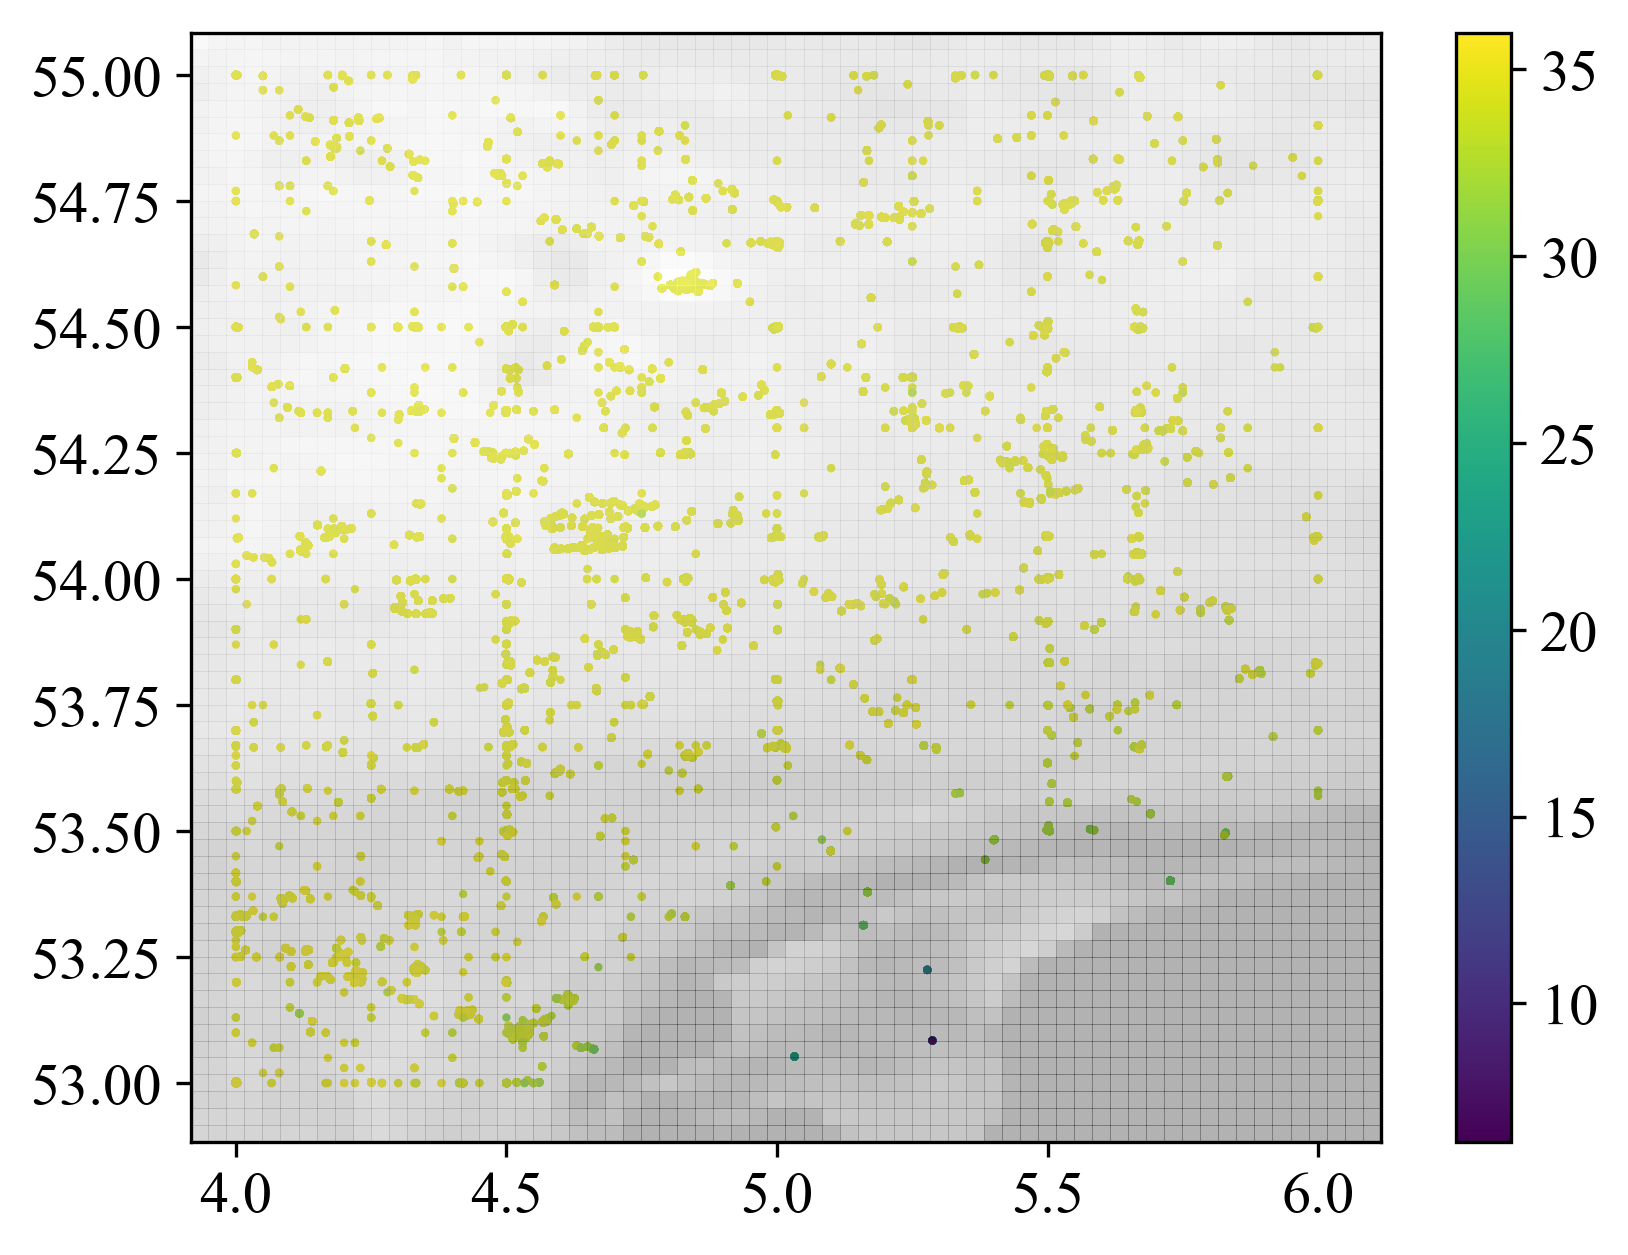

In [21]:
pcm = PyPlot.scatter(obslon[sel], obslat[sel], c=obsval[sel], s=1)
PyPlot.pcolormesh(bx, by, permutedims(b, [2,1]), alpha=.3, cmap=PyPlot.cm.gray, vmin=0.0)
#PyPlot.plot(obslon[sel3], obslat[sel3], "ro", markersize=6)
PyPlot.colorbar(pcm)
PyPlot.savefig("scatter_northsea.png", dpi=300, bbox_inches="tight")

In [18]:
sel3 = (obslon .== 5.032299995422363) .& (obslat .== 53.052799224853516)
length(findall(sel3))

133

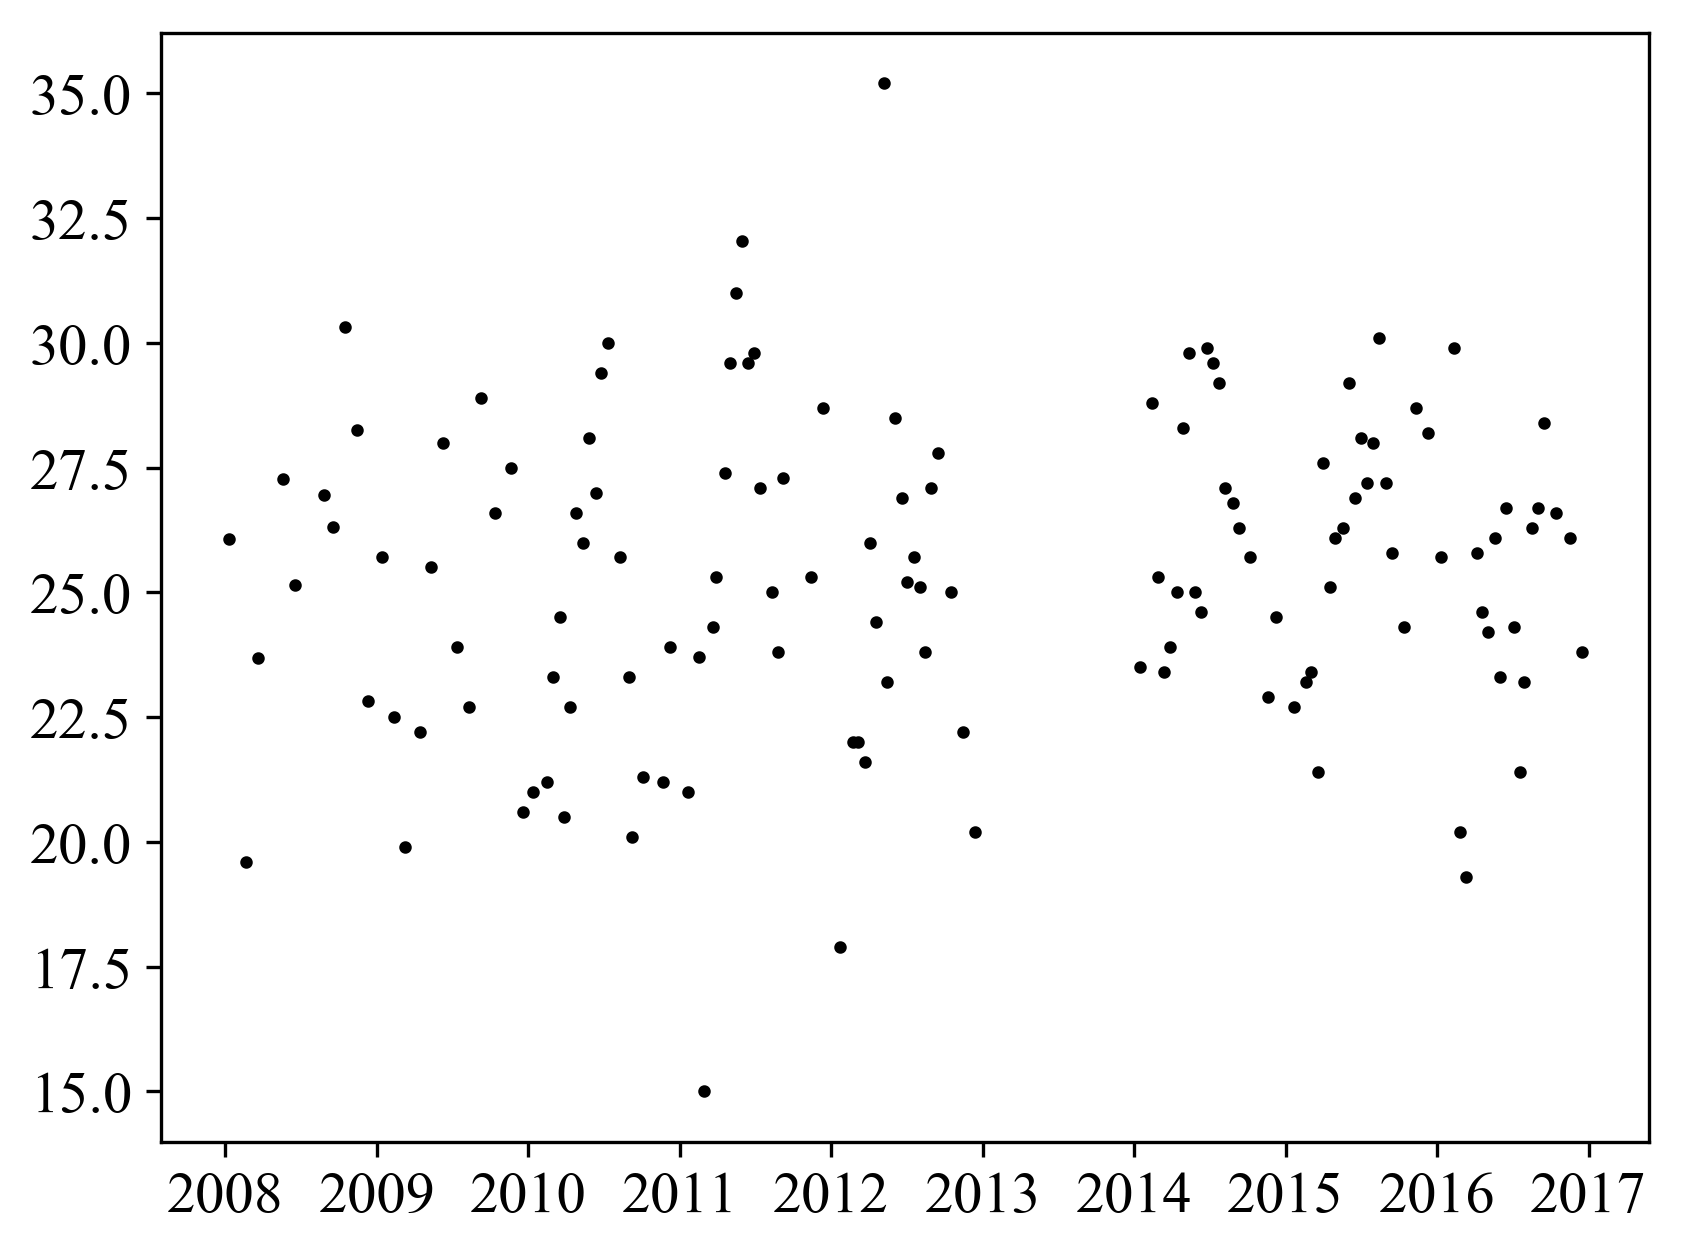

In [22]:
PyPlot.plot(obstime[sel3], obsval[sel3], "ko", ms=2)
PyPlot.savefig("timeseries_northsea.png", dpi=300, bbox_inches="tight")